In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanicdataset-traincsv/train.csv
/kaggle/input/testrag/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train = pd.read_csv('/kaggle/input/titanicdataset-traincsv/train.csv')
test = pd.read_csv('/kaggle/input/testrag/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Visualization

Percentage of Women who Survived: 74.20382165605095
Percentage of Men who Survived: 18.890814558058924


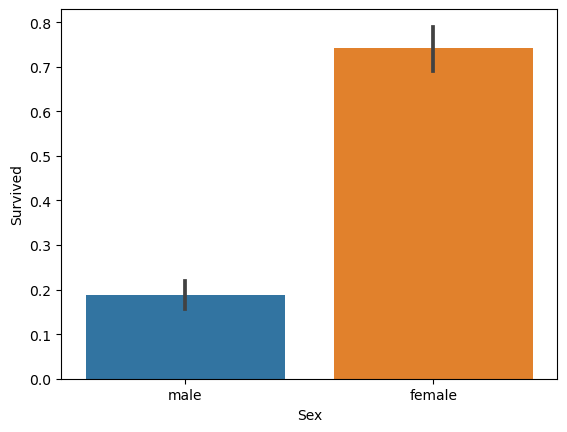

In [7]:
sns.barplot(x='Sex', y='Survived', data=train)
print('Percentage of Women who Survived:', train['Survived'][train['Sex'] == 'female'].value_counts(normalize=True)[1]*100)
print('Percentage of Men who Survived:', train['Survived'][train['Sex'] == 'male'].value_counts(normalize=True)[1]*100)

Percentage of Pclass = 1 who Survived: 62.96296296296296
Percentage of Pclass = 2 who Survived: 47.28260869565217
Percentage of Pclass = 3 who Survived: 24.236252545824847


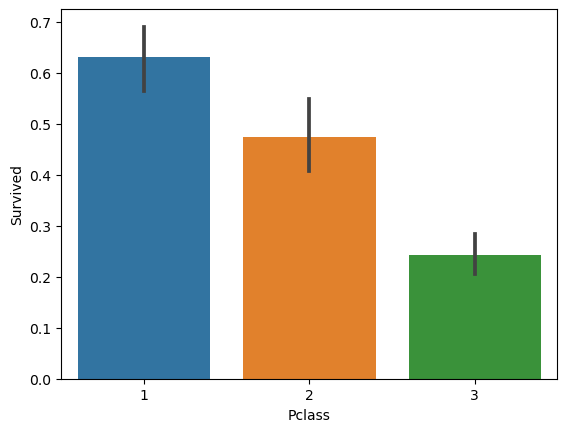

In [8]:
sns.barplot(x='Pclass', y='Survived', data=train)
print('Percentage of Pclass = 1 who Survived:', train['Survived'][train['Pclass'] == 1].value_counts(normalize=True)[1]*100)
print('Percentage of Pclass = 2 who Survived:', train['Survived'][train['Pclass'] == 2].value_counts(normalize=True)[1]*100)
print('Percentage of Pclass = 3 who Survived:', train['Survived'][train['Pclass'] == 3].value_counts(normalize=True)[1]*100)

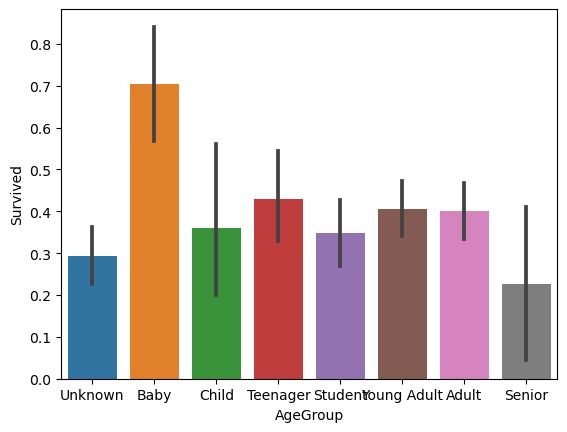

In [9]:
train.Age = train.Age.fillna(-0.5)
test.Age = test.Age.fillna(-0.5)

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins, labels = labels)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels=labels)
sns.barplot(x='AgeGroup', y='Survived', data=train)
plt.show()

In [10]:
train = train.drop(['Ticket', 'Cabin', 'Fare'], axis=1)
test = test.drop(['Ticket', 'Cabin', 'Fare'], axis=1)

### Dealing with missing values

In [11]:
print('Number of people embarking in Southampton (S): ')
southampton = train[train['Embarked'] == 'S'].shape[0]
print(southampton)

print('Number of people embarking in Cherbourg (C): ')
cherbourg = train[train['Embarked'] == 'C'].shape[0]
print(cherbourg)

print('Number of people embarking in Queenstown (Q): ')
queenstown = train[train['Embarked'] == 'Q'].shape[0]
print(queenstown)

Number of people embarking in Southampton (S): 
644
Number of people embarking in Cherbourg (C): 
168
Number of people embarking in Queenstown (Q): 
77


In [12]:
train = train.fillna({'Embarked' : 'S'})

In [13]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
dtype: int64

In [14]:
combine = [train, test]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-za-z]+)\.', expand=False)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [15]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()
                                                 

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [16]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Royal':5, 'Rare':6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [17]:
mr_age = train[train['Title'] == 1]['AgeGroup'].mode()
miss_age = train[train['Title'] == 2]['AgeGroup'].mode()
mrs_age = train[train['Title'] == 3]['AgeGroup'].mode()
master_age = train[train['Title'] == 4]['AgeGroup'].mode()
royal_age = train[train['Title'] == 5]['AgeGroup'].mode()
rare_age = train[train['Title'] == 6]['AgeGroup'].mode()
age_title_map = {1:'Young Adult', 2:'Student', 3:'Adult', 4:'Baby', 5:'Adult', 6:'Adult'}
for i in range(len(train['AgeGroup'])):
    if train['AgeGroup'][i] == 'Unknown':
        train['AgeGroup'][i] = age_title_map[train['Title'][i]]
for i in range(len(test['AgeGroup'])):
    if test['AgeGroup'][i] == 'Unknown':
        test['AgeGroup'][i] = age_title_map[test['Title'][i]]

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [19]:
train.AgeGroup.unique()

['Student', 'Adult', 'Young Adult', 'Baby', 'Teenager', 'Child', 'Senior']
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']

In [20]:
from sklearn.preprocessing import LabelEncoder

transform = ['Sex', 'AgeGroup', 'Embarked']
label_encoders = {}

for i in transform:
    le = LabelEncoder()
    train[i] = le.fit_transform(train[i])
    label_encoders[i] = le

In [21]:
for i in transform:
    le = LabelEncoder()
    test[i] = le.fit_transform(test[i])
    label_encoders[i] = le

In [22]:
X_Train = train.drop(['PassengerId', 'Name', 'Survived'], axis=1)
Y_Train = train['Survived']
X_Test = test.drop(['PassengerId', 'Name'], axis=1)

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_Train, Y_Train)
preds = lr.predict(X_Test)


In [24]:
model_filename = 'TitanicSurvivalModel.joblib'
joblib.dump(lr, model_filename)

['TitanicSurvivalModel.joblib']

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_Train, Y_Train)
pred1 = rf.predict(X_Test)

In [26]:
model_filename = 'TitanicSurvivalModel1.joblib'
joblib.dump(rf, model_filename, compress=True, protocol=4)

['TitanicSurvivalModel1.joblib']

In [27]:
from sklearn.model_selection import cross_val_score
lr_cv_scores = cross_val_score(lr, X_Train, Y_Train, cv=5)
rf_cv_scores = cross_val_score(rf, X_Train, Y_Train, cv=5)

print(f"Logistic Regression CV Scores: {lr_cv_scores}")
print(f"Random Forests CV Scores: {rf_cv_scores}")


Logistic Regression CV Scores: [0.79329609 0.76966292 0.79213483 0.79213483 0.79213483]
Random Forests CV Scores: [0.78212291 0.79213483 0.8258427  0.80898876 0.8258427 ]
